# Working with the GDP hourly dataset of position, velocity, and temperature

This notebook is intended to get you started on working with the GDP hourly dataset, version 2.00. This version is officially distributed by NOAA NCEI and the single datafile `gdp_v2.00.nc` (~12GB) can be downloaded directly from [NCEI](https://www.nodc.noaa.gov/archive/arc0199/0248584/1.1/data/0-data/). Alternatively, the dataset can be opened remotely using the *xarray* library as shown below. We provide some examples of what can be done with this dataset. This notebook was put together by [Shane Elipot](https://github.com/selipot) and [Philippe Miron](https://github.com/philippemiron).

When using this dataset in your studies or publications, please use the following citation:

- Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurioni, Luca; Pazos, Mayra (2022). *Hourly location, current velocity, and temperature collected from Global Drifter Program drifters world-wide*.[indicate subset used]. NOAA National Centers for Environmental Information. Dataset. https://doi.org/10.25921/x46c-3620. Accessed [date].

Additionally, we would be very grateful if you could cite the papers describing how the dataset were derived. If you use the dataset of position and velocity, please cite:

- Elipot, S., R. Lumpkin, R. C. Perez, J. M. Lilly, J. J. Early, and A. M. Sykulski (2016), *A global surface drifter dataset at hourly resolution*, J. Geophys. Res. Oceans, 121, [doi:10.1002/2016JC011716](https://dx.doi.org/10.1002/2016JC011716).

And if you use the dataset of sea surface temperature, please cite:

- Elipot, S., A. Sykulski, R. Lumpkin, L. Centurioni, and M. Pazos (2022), *A Dataset of Hourly Sea Surface Temperature From Drifting Buoys*, Scientific Data, 9, 567, [doi:10.1038/s41597-022-01670-2](https://dx.doi.org/10.1038/s41597-022-01670-2).

## Using *xarray*

In [1]:
#import the needed library
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Here we propose two options: you have either downloaded the data file and have it somewhere on your computer (option 1), or you open it remotely (option2). This last option may be slow depending on your internet connection. Comment and uncomment as needed below:

In [2]:
file = 'gdp_v2.00.nc'

# # option 1: open locally after download
# path = '/Users/selipot/Downloads/'
# ds = xr.open_dataset(path+file)

# option 2: open remotely without downloading
url_path = 'https://www.nodc.noaa.gov/archive/arc0199/0248584/1.1/data/0-data/'
ds = xr.open_dataset(url_path+file+'#mode=bytes')

In [3]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

Here the dataset is opened as a `xarray.Dataset` object. The dataset contains the dimension `traj` which is equal to the number of trajectories (17324 for v2.00). The 37 variables with this dimension correspond to what may be referred to as *metadata* such as the buoy type (`buoy_type`), the deployment date (`deploy_date`) etc. The other 16 Lagrangian variables (velocity, position, SST, etc.) along the 17324 trajectories are stored one after the other along the `obs` dimension.  In order to track the length of each consecutive drifter trajectory, an array variable called `rowsize` contains the trajectory lengths. Note that for practical reasons, the identification numbers, or IDs, of the drifters are both found in the `ID` variable with dimension `traj` and the `ids` variable with dimension `obs`. This last Lagrangian variable can also be used to track individual trajectories. 

Let's consider a simple use of the data: let's say we want to plot the trajectory of drifter with ID number 2578 with the non-diurnal SST displayed along the trajectory. 

To do this, we  need to find the indices of the data for that drifter thanks to the `rowsize` variable. With an *xarray* dataset, we need to create first a variable that indexes the beginning of each trajectory: we create an array `traj_idx` in which `traj_idx[i]` is the starting index of the data for the (i+1)<sup>th</sup> trajectory (since *Python* uses zero-based indexing.).

In [4]:
# create the index array
traj_idx = np.insert(np.cumsum(ds.rowsize.values), 0, 0)

In [5]:
n = 2578
# find the index for drifter ID 2578
j = int(np.where(ds.ID==n)[0])
display('drifter index for ID '+str(n)+' is '+str(j))
ds.sst1[slice(traj_idx[j], traj_idx[j+1])]

'drifter index for ID 2578 is 3974'

<xarray.DataArray 'sst1' (obs: 5137)>
array([272.718, 272.717, 272.715, ..., 268.15 , 268.15 , 268.15 ],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 ...
    latitude   (obs) float32 ...
    time       (obs) datetime64[ns] ...
    ids        (obs) int64 ...
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted non-diurnal sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface non-diurnal sea water temperature from...

Above we peaked at the `sst1` variable for this particular drifter. Note that the unit of this variable is the Kelvin. See [Elipot et al. 2022](https://doi.org/10.1038/s41597-022-01670-2
) for details about the hourly temperature dataset for the GDP.

In [6]:
# create the slice index `sli` for data from that drifter
sli = slice(traj_idx[j], traj_idx[j+1])
display(sli)
# also we want to know the minimum and maximum values in degrees Celsius of the good data (quality flag 4 and 5)
v1 = ds.sst1[sli].where(ds.flg_sst1[sli]>=4).min()-273.15
v2 = ds.sst1[sli].where(ds.flg_sst1[sli]>=4).max()-273.15
display([v1,v2])

slice(43125264, 43130401, None)

[<xarray.DataArray 'sst1' ()>
 array(-1.76599731),
 <xarray.DataArray 'sst1' ()>
 array(22.46300659)]

Now we are ready to plot the trajectory:

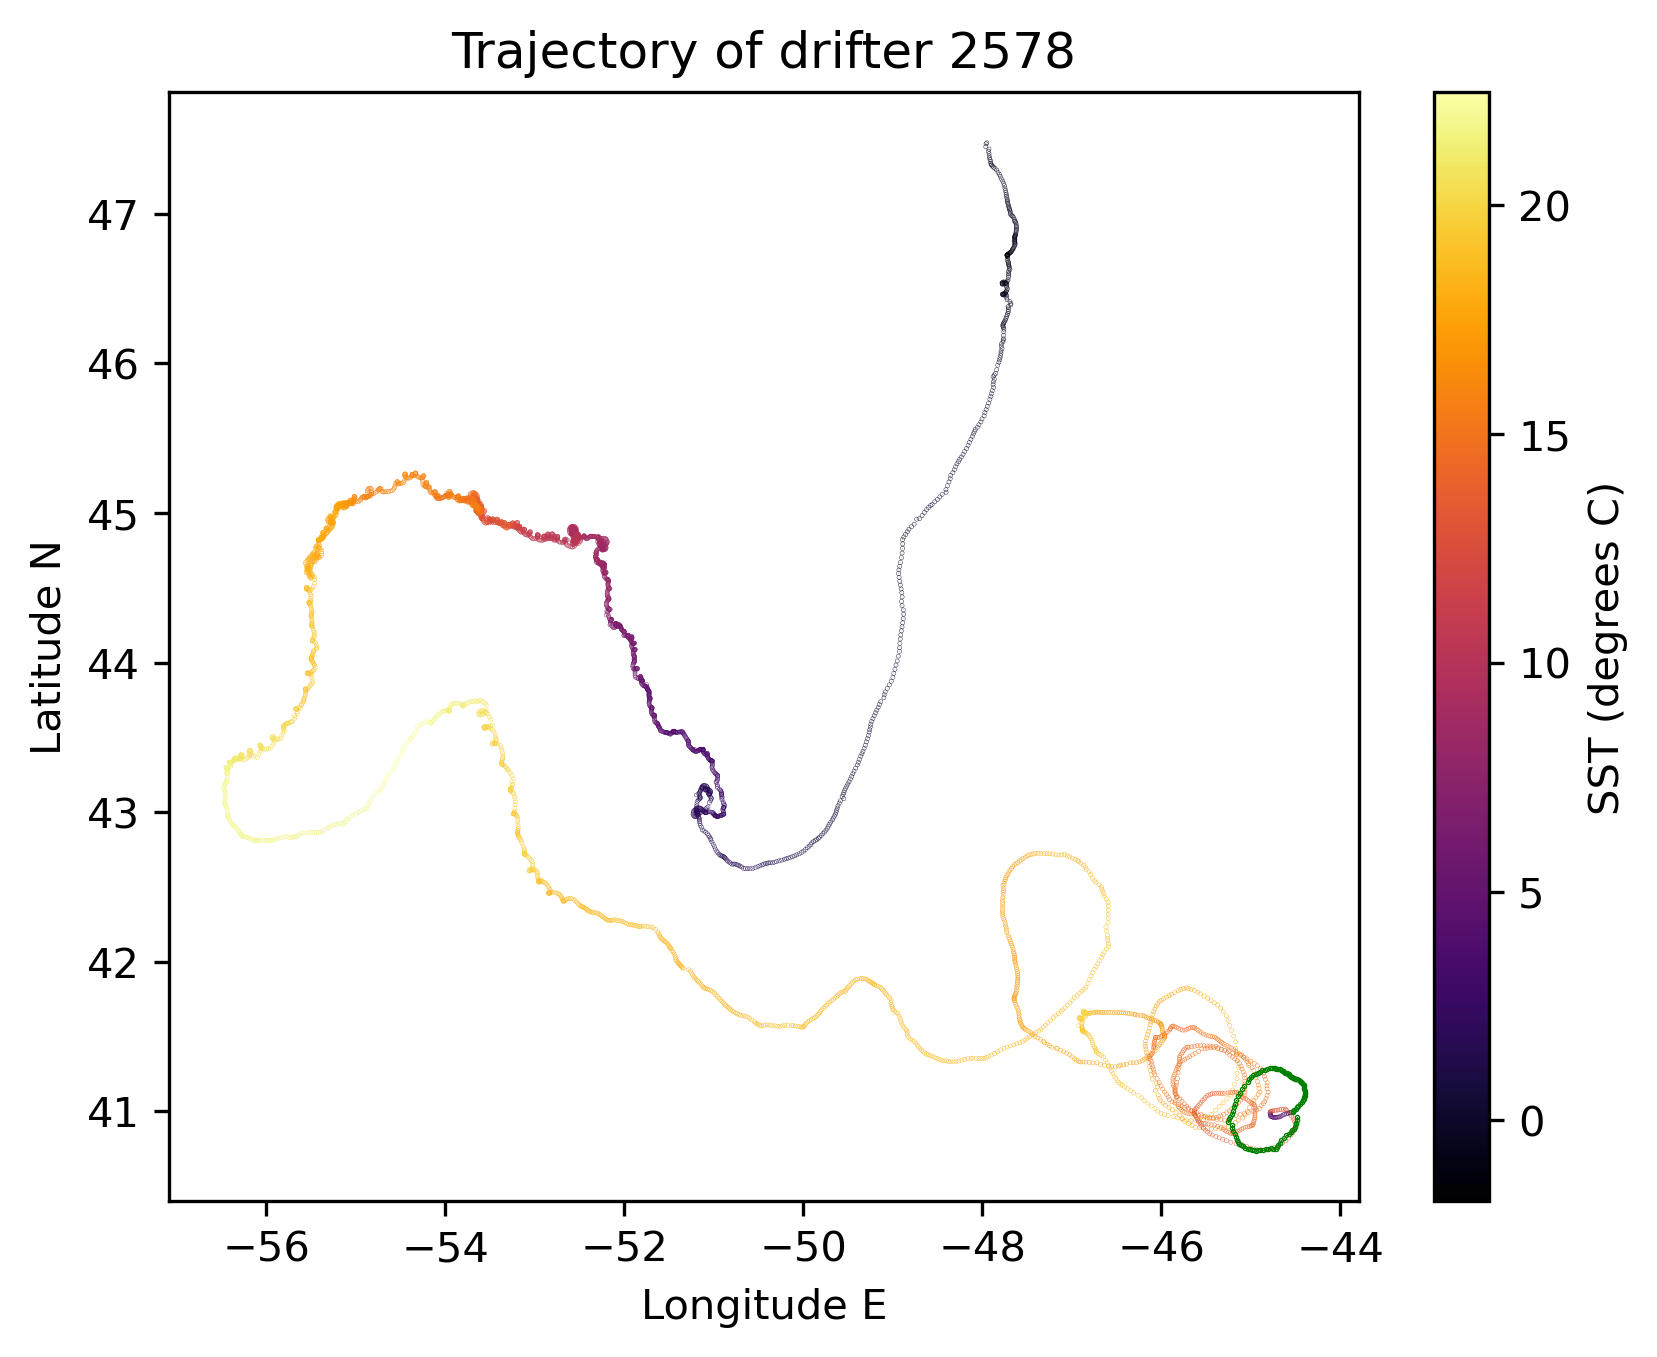

In [7]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(1,1,1)
#fig, ax = plt.subplots(1)
# temperature data are in Kelvin so we convert to degree Celsius
# we plot only the non-diurnal SST estimates (sst1) with quality flag (flg_sst1) 4 or 5. 
pcm1 = ax.scatter(ds.longitude[sli].where(ds.flg_sst1[sli]>=4), ds.latitude[sli].where(ds.flg_sst1[sli]>=4),
                 s=0.01, c=ds.sst1[sli].where(ds.flg_sst1[sli]>=4)-273.15,vmin=v1, vmax=v2,cmap='inferno',edgecolor='face')
# we plot the other positions with "bad" SST estimates in green (quality flag less than 4)
pcm2 = ax.scatter(ds.longitude[sli].where(ds.flg_sst1[sli]<4), ds.latitude[sli].where(ds.flg_sst1[sli]<4),
                 s=0.1, c='green')
cb = fig.colorbar(pcm1,ax=ax)
cb.set_label('SST (degrees C)')
ax.set_ylabel('Latitude N')
ax.set_xlabel('Longitude E')
ax.set_title('Trajectory of drifter '+str(n));

Next we want to plot the time series of eastward (`ve` or zonal, u) and northward (`vn` or meridional, v) velocities along this drifter trajectory:

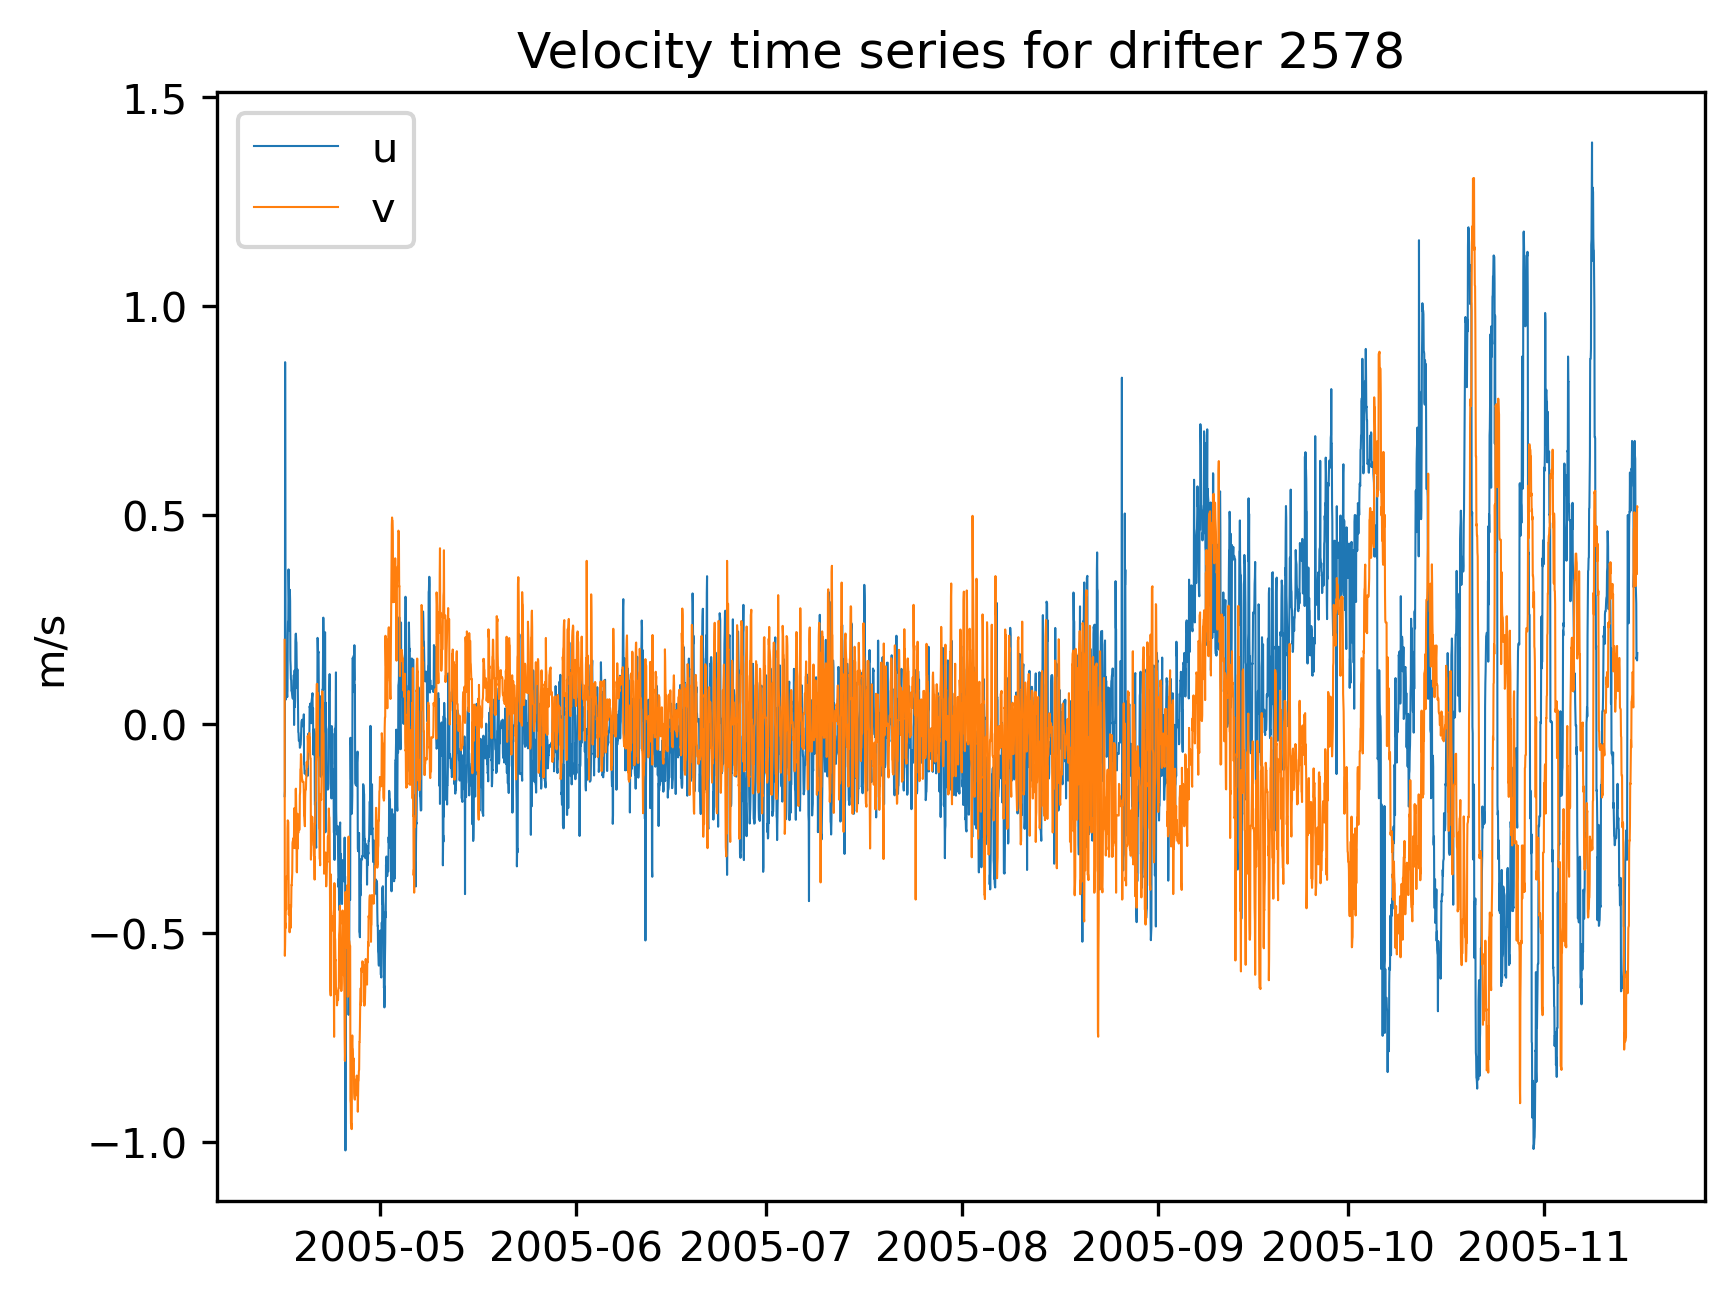

In [8]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(1,1,1)
pcm1 = ax.plot(ds.time[sli],ds.ve[sli],linewidth=0.5)
pcm2 = ax.plot(ds.time[sli],ds.vn[sli],linewidth=0.5)
ax.legend(['u', 'v'])
ax.set_ylabel('m/s')
ax.set_title('Velocity time series for drifter '+str(n));

Plenty more can be done with these data! If you want to see more example, head to this other [notebook](https://github.com/Cloud-Drift/earthcube-meeting-2022) that benchmark various python libraries that can be used to work with this dataset.